## Penggunaan Reinforcement Learning pada Lunar Lander

Mari kita lihat bagaimana kita dapat menggunakan **reinforcement learning** untuk mengendalikan **Lunar Lander** atau untuk masalah **reinforcement learning** lainnya. Ide kuncinya adalah kita akan melatih sebuah **neural network** untuk menghitung atau mendekati fungsi nilai aksi status \( Q(s, a) \) yang pada gilirannya akan memungkinkan kita untuk memilih aksi yang baik. Mari kita lihat bagaimana cara kerjanya.

### Inti Algoritma Pembelajaran

Inti dari algoritma pembelajaran adalah kita akan melatih sebuah **neural network** yang menerima input berupa **current state** dan **current action**, serta menghitung atau mendekati \( Q(s, a) \). Untuk **Lunar Lander**, kita akan mengambil status \( s \) dan aksi \( a \) dan menggabungkannya. Secara konkret, status adalah daftar delapan angka yang telah kita lihat sebelumnya, yaitu:

- \( x \)
- \( y \)
- \( \dot{x} \)
- \( \dot{y} \)
- \( \Theta \)
- \( \dot{\Theta} \)
- \( LR \) (posisi kaki)

Jadi, ini adalah daftar delapan angka yang mendeskripsikan status. Kemudian, kita memiliki empat aksi yang mungkin:

1. Tidak ada
2. Kiri
3. Mesin utama
4. Kanan

Kita dapat mengkodekan salah satu dari empat aksi ini menggunakan **one-hot feature vector**. Jika aksi adalah aksi pertama, kita dapat mengkodekannya sebagai \( [1, 0, 0, 0] \); jika itu adalah aksi kedua untuk menemukan cluster kiri, kita dapat mengkodekannya sebagai \( [0, 1, 0, 0] \). 

Daftar 12 angka ini—delapan untuk status dan empat untuk **one-hot encoding** aksi—adalah input yang kita masukkan ke dalam **neural network**, yang akan kita sebut \( X \). Kemudian, kita akan mengambil 12 angka ini dan memberikan mereka ke **neural network** dengan, katakanlah, 64 unit di lapisan tersembunyi pertama, 64 unit di lapisan tersembunyi kedua, dan satu output di lapisan keluaran. Tugas **neural network** ini adalah untuk menghasilkan \( Q(s, a) \).

### Proses Pelatihan Neural Network

Kita akan menggunakan algoritma pelatihan **neural network** dalam waktu dekat, dan saya juga akan merujuk pada nilai \( Q(s, a) \) ini sebagai **target value** \( Y \) yang kita latih untuk mendekati. Perhatikan bahwa saya telah mengatakan bahwa **reinforcement learning** berbeda dari **supervised learning**, tetapi apa yang akan kita lakukan adalah tidak memasukkan status dan mendapatkan output aksi. Apa yang akan kita lakukan adalah memasukkan pasangan status-aksi dan mencoba untuk menghasilkan \( Q(s, a) \). Menggunakan **neural network** dalam algoritma **reinforcement learning** dengan cara ini akan terbukti bekerja dengan baik.

### Menghitung \( Q(s, a) \)

Setiap kali **Lunar Lander** berada dalam status \( s \), kita dapat menggunakan **neural network** untuk menghitung \( Q(s, a) \). Untuk semua empat aksi, kita dapat menghitung \( Q(s, \text{nothing}) \), \( Q(s, \text{left}) \), \( Q(s, \text{main}) \), dan \( Q(s, \text{right}) \). Kemudian, dari nilai-nilai ini, yang memiliki nilai tertinggi akan dipilih sebagai aksi \( a \). Misalnya, jika dari keempat nilai tersebut, \( Q(s, \text{main}) \) adalah yang terbesar, maka kita akan memutuskan untuk menyalakan mesin utama dari **Lunar Lander**.

### Membangun Dataset Pelatihan

Pertanyaan yang muncul adalah, bagaimana cara melatih **neural network** untuk menghasilkan \( Q(s, a) \)? Pendekatannya adalah menggunakan **Bellman's equations** untuk membuat set pelatihan dengan banyak contoh \( (x, y) \), dan kemudian kita akan menggunakan **supervised learning** seperti yang telah Anda pelajari di kursus kedua ketika kita membahas tentang **neural networks**.

#### Persamaan Bellman

Inilah persamaan **Bellman**:

\[
Q(s, a) = R(s) + \gamma \max_{a'} Q(s', a')
\]

Sisi kanan adalah apa yang ingin kita jadikan \( Q(s, a) \), jadi saya akan menyebut nilai di sisi kanan ini sebagai \( y \) dan input ke **neural network** adalah status dan aksi, jadi saya akan menyebutnya \( x \). Tugas dari **neural network** adalah untuk memasukkan \( x \) (yaitu pasangan status-aksi) dan mencoba untuk memprediksi dengan akurat apa nilai di sisi kanan.

### Mengumpulkan Contoh Pelatihan

Mari kita lihat bagaimana kita akan mendapatkan set pelatihan dengan nilai \( x \) dan \( y \) yang kemudian dapat kita gunakan untuk melatih **neural network**. Kita akan menggunakan **Lunar Lander** dan mencoba mengambil berbagai aksi di dalamnya. Jika kita belum memiliki kebijakan yang baik, kita akan mengambil aksi secara acak: menyalakan thruster kiri, menyalakan thruster kanan, menyalakan mesin utama, atau tidak melakukan apa-apa. Dengan hanya mencoba berbagai aksi di simulator **Lunar Lander**, kita akan mengamati banyak contoh ketika kita berada dalam status tertentu dan mengambil aksi tertentu, apakah itu aksi yang baik atau buruk.

Sebagai contoh, kita bisa memiliki situasi berikut:

1. Dalam status \( S^1 \), kita mengambil aksi \( a^1 \) dan mendapatkan reward \( R \) dan berakhir di status \( S'^1 \).
2. Dalam status \( S^2 \), kita mengambil aksi \( a^2 \), mendapatkan reward, dan berakhir di status \( S'^2 \).

Kita dapat menyimpan hingga 10.000 contoh pengalaman ini dan masing-masing tupel akan cukup untuk membuat satu contoh pelatihan \( (x^1, y^1) \). Secara khusus, berikut adalah bagaimana Anda melakukannya:

- **Input \( x^1 \)**: \( S^1 \) dan \( a^1 \) digabungkan. \( S^1 \) adalah delapan angka (status **Lunar Lander**) dan \( a^1 \) adalah empat angka (**one-hot encoding** aksi).
- **Output \( y^1 \)**: Dihitung menggunakan sisi kanan persamaan **Bellman**.

Misalnya, ketika kita input \( S^1, a^1 \), kita ingin \( Q(S^1, a^1) \) sama dengan:

\[
R(S^1) + \gamma \max_{a'} Q(S'^1, a')
\]

Di sini, kita menyimpan hasilnya sebagai \( y^1 \), sehingga pasangan \( (x^1, y^1) \) menjadi contoh pelatihan pertama dalam dataset kecil yang kita hitung.

### Mengulangi Proses

Anda mungkin bertanya-tanya, dari mana \( Q(S', a') \) atau \( Q(S'^1, a') \) berasal? Awalnya, kita tidak tahu apa fungsi \( Q \). Namun, ketika kita tidak tahu apa fungsi \( Q \), kita bisa memulai dengan menebak secara acak. Selama setiap langkah, \( Q \) di sini hanya akan menjadi tebakan. Seiring waktu, tebakan ini akan menjadi lebih baik.

Mari kita lihat contoh kedua. Jika Anda memiliki pengalaman kedua di mana Anda berada di status \( S^2 \), mengambil aksi \( a^2 \), mendapatkan reward, dan berakhir di status tersebut, kita akan membuat contoh pelatihan kedua di dataset ini, \( x^2 \), di mana input sekarang adalah \( S^2, a^2 \). Proses ini akan berlanjut sampai Anda mungkin mendapatkan 10.000 contoh pelatihan dengan pasangan \( (x, y) \).

### Pelatihan Neural Network

Akhirnya, kita akan melatih **neural network**. Set pelatihan akan terdiri dari 10.000 contoh \( (x, y) \). Untuk contoh pelatihan kita, \( x \) akan berupa \( s, a \) dari tupel ini, sedangkan target value yang ingin kita prediksi oleh **neural network** adalah:

\[
y = R(s) + \gamma \max_{a'} Q(s', a')
\]

Awalnya, nilai \( Q \) diambil dari **neural network** yang telah kita inisialisasi secara acak. Walaupun tidak sempurna, proses pelatihan bertujuan untuk memperbaiki parameter guna mendapatkan estimasi yang lebih baik dari fungsi \( Q \).

### Kesimpulan

Apa yang saya jelaskan di sini hanyalah satu bagian dari algoritma pembelajaran yang akan kita gunakan. Mari kita satukan semuanya pada slide berikutnya dan lihat bagaimana semua ini terintegrasi menjadi satu algoritma lengkap.

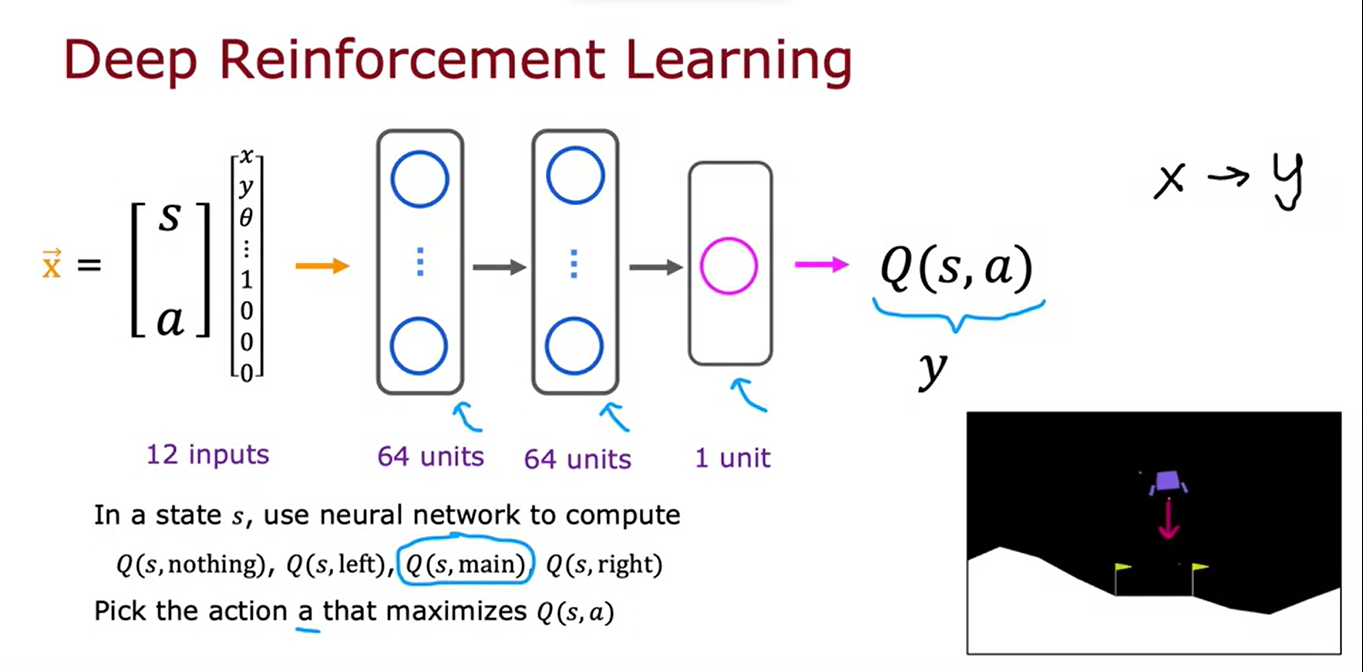
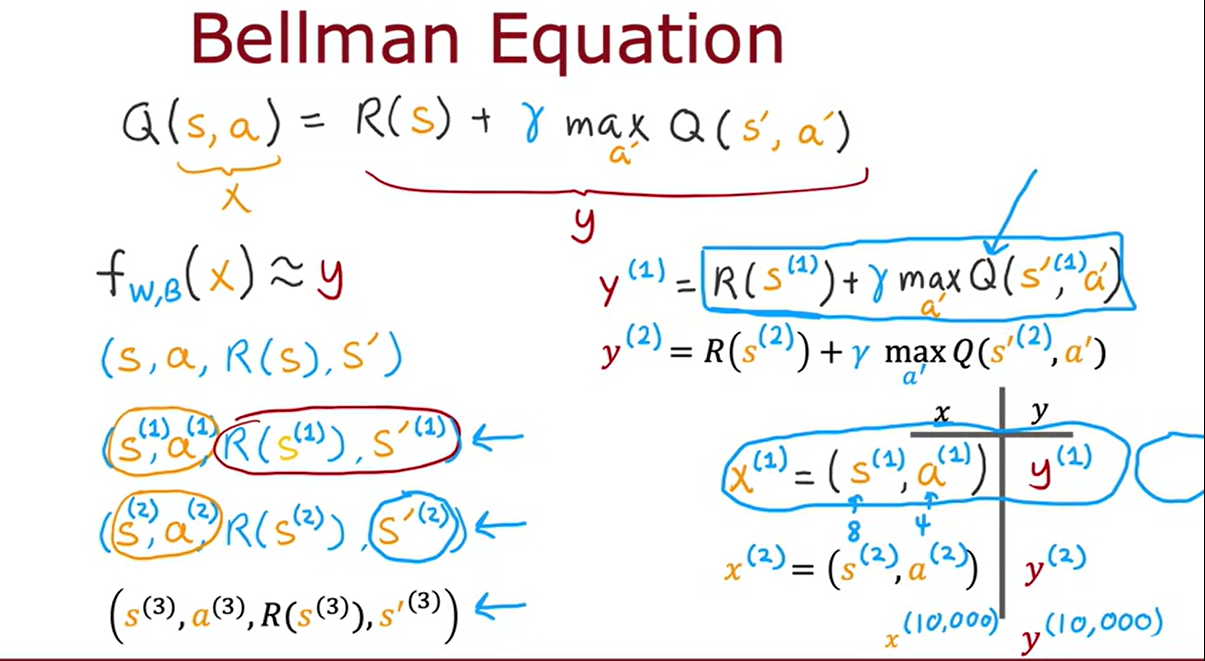
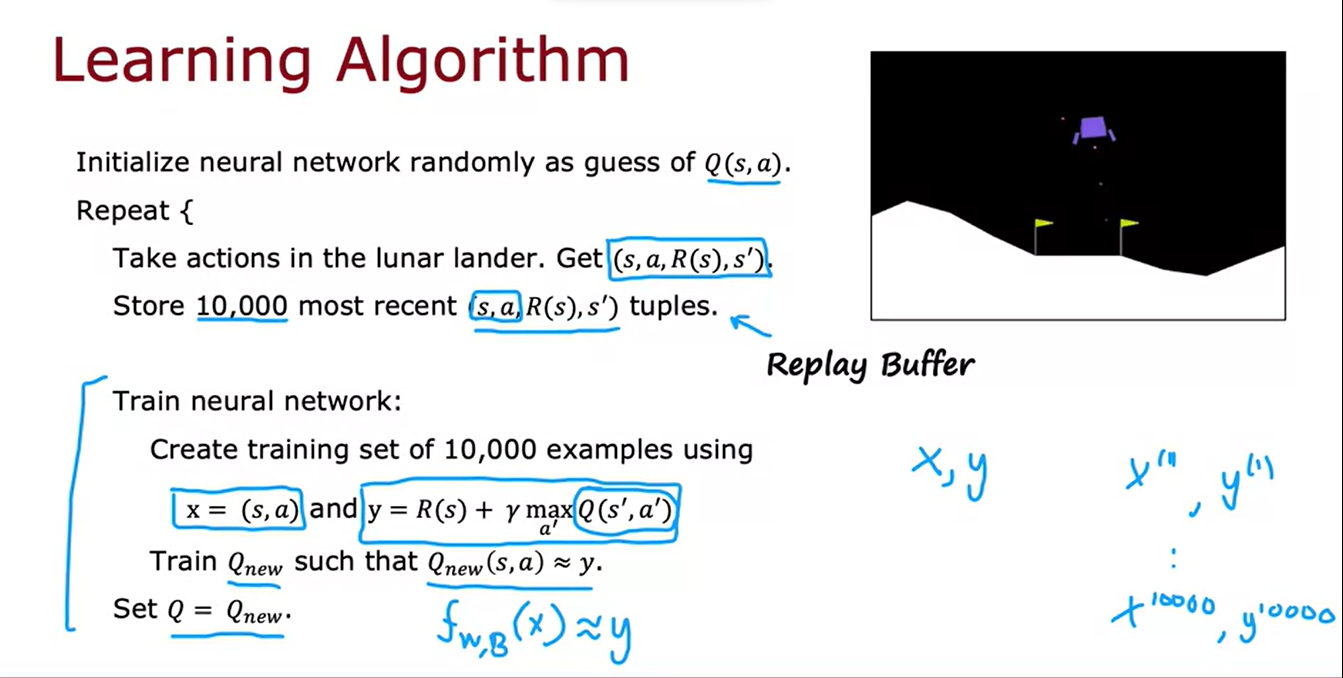